In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
datasets = [
        "adult",
        "german",
        "compas",
        "diabetes",
        "breast_cancer",
        ]

attack_list = [
        'deepfool', 
        'carlini_l_2', 
        # 'carlini_l_inf', 
        'lowprofool_l_2', 
        # 'lowprofool_l_inf', 
        # 'fgsm_l_1',
        # 'fgsm_l_2',
        'fgsm_l_inf',
        # 'bim',
        # 'mim',
        # 'pgd_l_1',
        # 'pgd_l_2',
        'pgd_l_inf',

        # 'boundary', 
        # 'hopskipjump_l_2', 'hopskipjump_l_inf'
        ]

def compare_cols(row):
    if row['ground_truth'] != row['adv_prediction']:
        return 1
    else:
        return 0

In [4]:
data_list_list=[]
for dataset in datasets:
    data_list = []
    for attack in attack_list:
        folder_name = f'{attack}_{dataset}'
        file_name_lr = f'eval_{folder_name}_lr_result_0.csv'
        result_path_lr = f'./results/{folder_name}/{file_name_lr}'
        file_name_svc = f'eval_{folder_name}_svc_result_0.csv'
        result_path_svc = f'./results/{folder_name}/{file_name_svc}'
        file_name_nn = f'eval_{folder_name}_nn_2_result_0.csv'
        result_path_nn = f'./results/{folder_name}/{file_name_nn}'

        try:
            df1 = pd.read_csv(result_path_lr)
            df2 = pd.read_csv(result_path_svc)
            df3 = pd.read_csv(result_path_nn)
        except:
            continue

        data1 = df1[['eval_L2', 'eval_Sen', 'eval_Mahalanobis', 'eval_Sparsity', 'ground_truth', 'adv_prediction']]
        data1['model'] = 'LR'

        data2 = df2[['eval_L2', 'eval_Sen', 'eval_Mahalanobis', 'eval_Sparsity', 'ground_truth', 'adv_prediction']]
        data2['model'] = 'SVC'

        data3 = df3[['eval_L2', 'eval_Sen', 'eval_Mahalanobis', 'eval_Sparsity', 'ground_truth', 'adv_prediction']]
        data3['model'] = 'MLP'


        data = pd.concat([data1, data2 , data3], axis=0) # data2
        data['attack'] = attack 
        data['dataset'] = dataset
        data_list.append(data)
    
    data_list_df = pd.concat(data_list, axis=0)

    data_list_df['attack_success'] = data_list_df.apply(compare_cols, axis=1)
    # data_list_df.to_csv(f'{dataset}_l2_success.csv')

    data_list_list.append(data_list_df)


C:\Users\n10599070\AppData\Local\Temp\ipykernel_14920\4221973197.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['model'] = 'LR'
C:\Users\n10599070\AppData\Local\Temp\ipykernel_14920\4221973197.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['model'] = 'SVC'
C:\Users\n10599070\AppData\Local\Temp\ipykernel_14920\4221973197.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [5]:
data_list_list_df = pd.concat(data_list_list, axis=0)
data_list_list_df = data_list_list_df.astype({'eval_L2':float, 'eval_Sen':float, 'eval_Mahalanobis':float, 'attack_success': float, 'eval_Sparsity':float})


In [6]:
data_list_list_df

,eval_L2,eval_Sen,eval_Mahalanobis,eval_Sparsity,ground_truth,adv_prediction,model,attack,dataset,attack_success
0,0.832862,3.445641,0.067658,4.0,<=50K,>50K,LR,deepfool,adult,1.0
1,0.002511,0.010387,0.000204,4.0,<=50K,>50K,LR,deepfool,adult,1.0
2,0.061329,0.146191,0.009033,2.0,>50K,>50K,LR,deepfool,adult,0.0
3,0.665483,2.753176,0.054061,4.0,<=50K,>50K,LR,deepfool,adult,1.0
4,0.245437,1.015401,0.019938,4.0,<=50K,>50K,LR,deepfool,adult,1.0
...,...,...,...,...,...,...,...,...,...,...
59,1.402326,1.783665,0.393426,30.0,N,Y,MLP,pgd_l_inf,breast_cancer,1.0
60,1.464652,1.894572,0.478344,30.0,N,Y,MLP,pgd_l_inf,breast_cancer,1.0
61,1.544936,2.043933,0.163271,30.0,Y,N,MLP,pgd_l_inf,breast_cancer,1.0
62,1.557057,2.098848,0.406677,30.0,Y,N,MLP,pgd_l_inf,breast_cancer,1.0


In [7]:
# replace cell values
data_list_list_df['attack'] = data_list_list_df['attack'].replace('fgsm_l_inf', 'FGSM')
data_list_list_df['attack'] = data_list_list_df['attack'].replace('pgd_l_inf', 'PGD')
data_list_list_df['attack'] = data_list_list_df['attack'].replace('carlini_l_2', 'C&W')
data_list_list_df['attack'] = data_list_list_df['attack'].replace('lowprofool_l_2', 'LowProFool')
data_list_list_df['attack'] = data_list_list_df['attack'].replace('deepfool', 'DeepFool')

data_list_list_df['dataset'] = data_list_list_df['dataset'].replace('adult', 'Adult')
data_list_list_df['dataset'] = data_list_list_df['dataset'].replace('german', 'German')
data_list_list_df['dataset'] = data_list_list_df['dataset'].replace('compas', 'Compas')
data_list_list_df['dataset'] = data_list_list_df['dataset'].replace('diabetes', 'Diabetes')
data_list_list_df['dataset'] = data_list_list_df['dataset'].replace('breast_cancer', 'Breast Cancer')

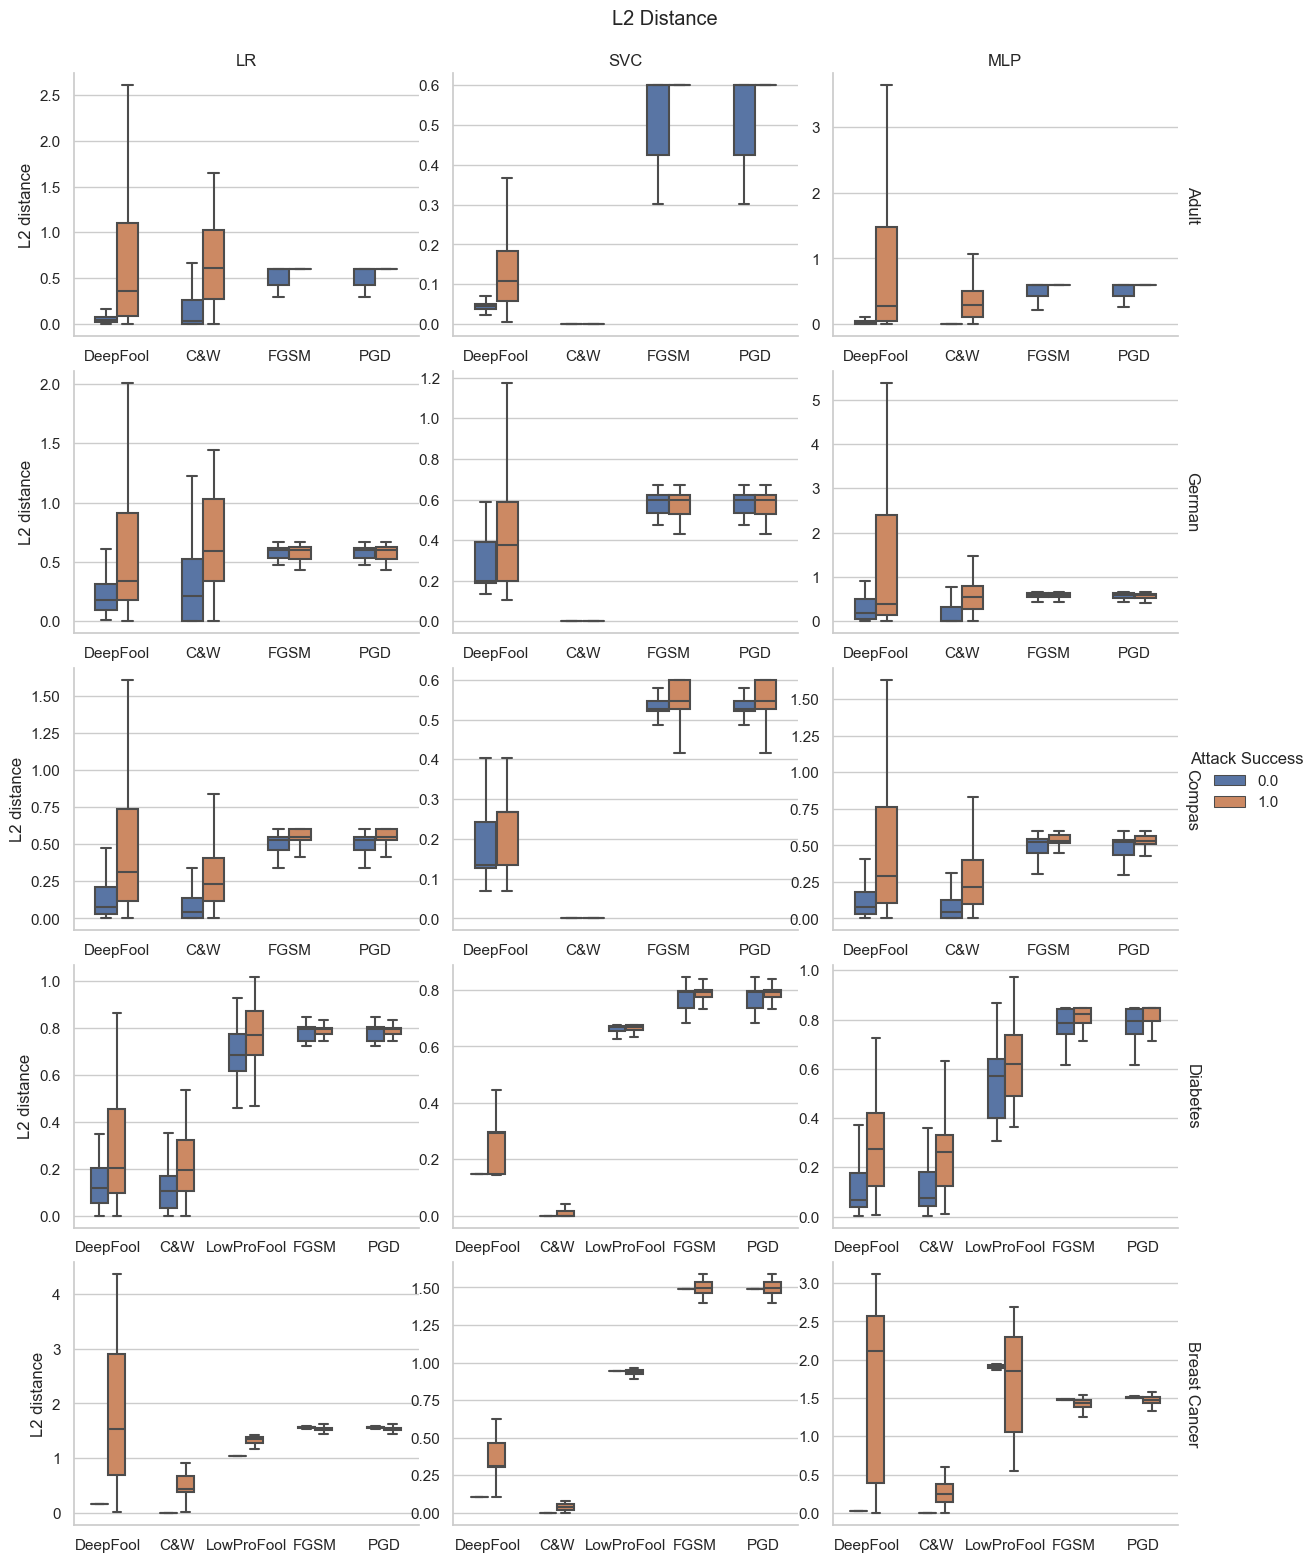

In [20]:
# plot violin plot, for each chart include two class (attack success or not) of all attacks for each dataset and model
# three models: LR, SVC, MLP
# five datasets: Adult, German, Compas, Diabetes, Breast Cancer

# L2 distance
sns.set_theme(style="whitegrid")
# sns.set(font_scale=1.5)
g = sns.catplot(x="attack", y="eval_L2", hue="attack_success", col="model", row="dataset", 
                data=data_list_list_df, kind="box", height=4, aspect=1.5, margin_titles=True,
                sharex=False, sharey=False, legend=False, showfliers=False, width=0.5)
g.set_axis_labels("", "L2 distance")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.add_legend(title='Attack Success')
g.fig.subplots_adjust(top=0.94)
g.fig.suptitle('L2 Distance')
g.fig.set_size_inches(13, 16)
g.savefig('Visualisation/l2_distance_boxplot.png')







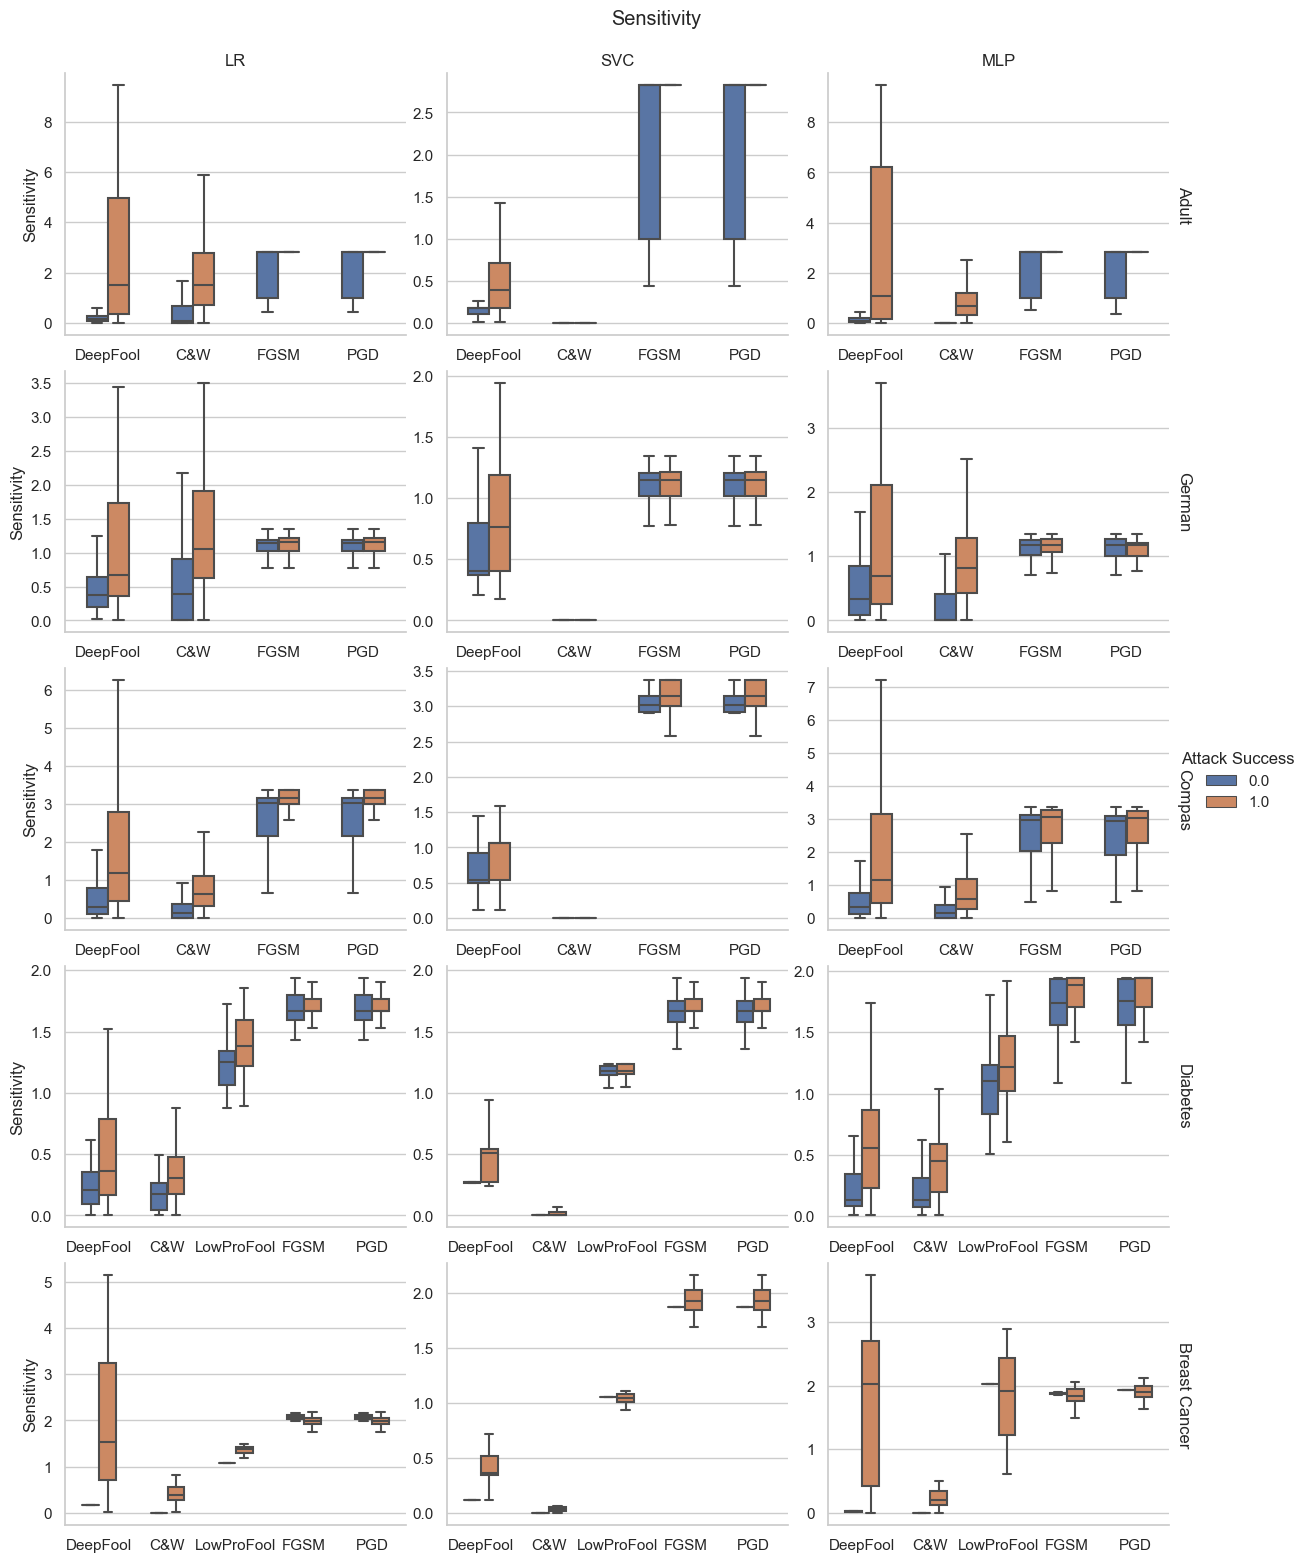

In [21]:
# Sensitivity
sns.set_theme(style="whitegrid")
# sns.set(font_scale=1.5)
g = sns.catplot(x="attack", y="eval_Sen", hue="attack_success", col="model", row="dataset", 
                data=data_list_list_df, kind="box", height=4, aspect=1.5, margin_titles=True,
                sharex=False, sharey=False, legend=False, showfliers=False, width=0.5)
# , palette="Set1"
g.set_axis_labels("", "Sensitivity")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.add_legend(title='Attack Success')
g.fig.subplots_adjust(top=0.94)
g.fig.suptitle('Sensitivity')
g.fig.set_size_inches(13, 16)
g.savefig('Visualisation/sensitivity_boxplot.png')




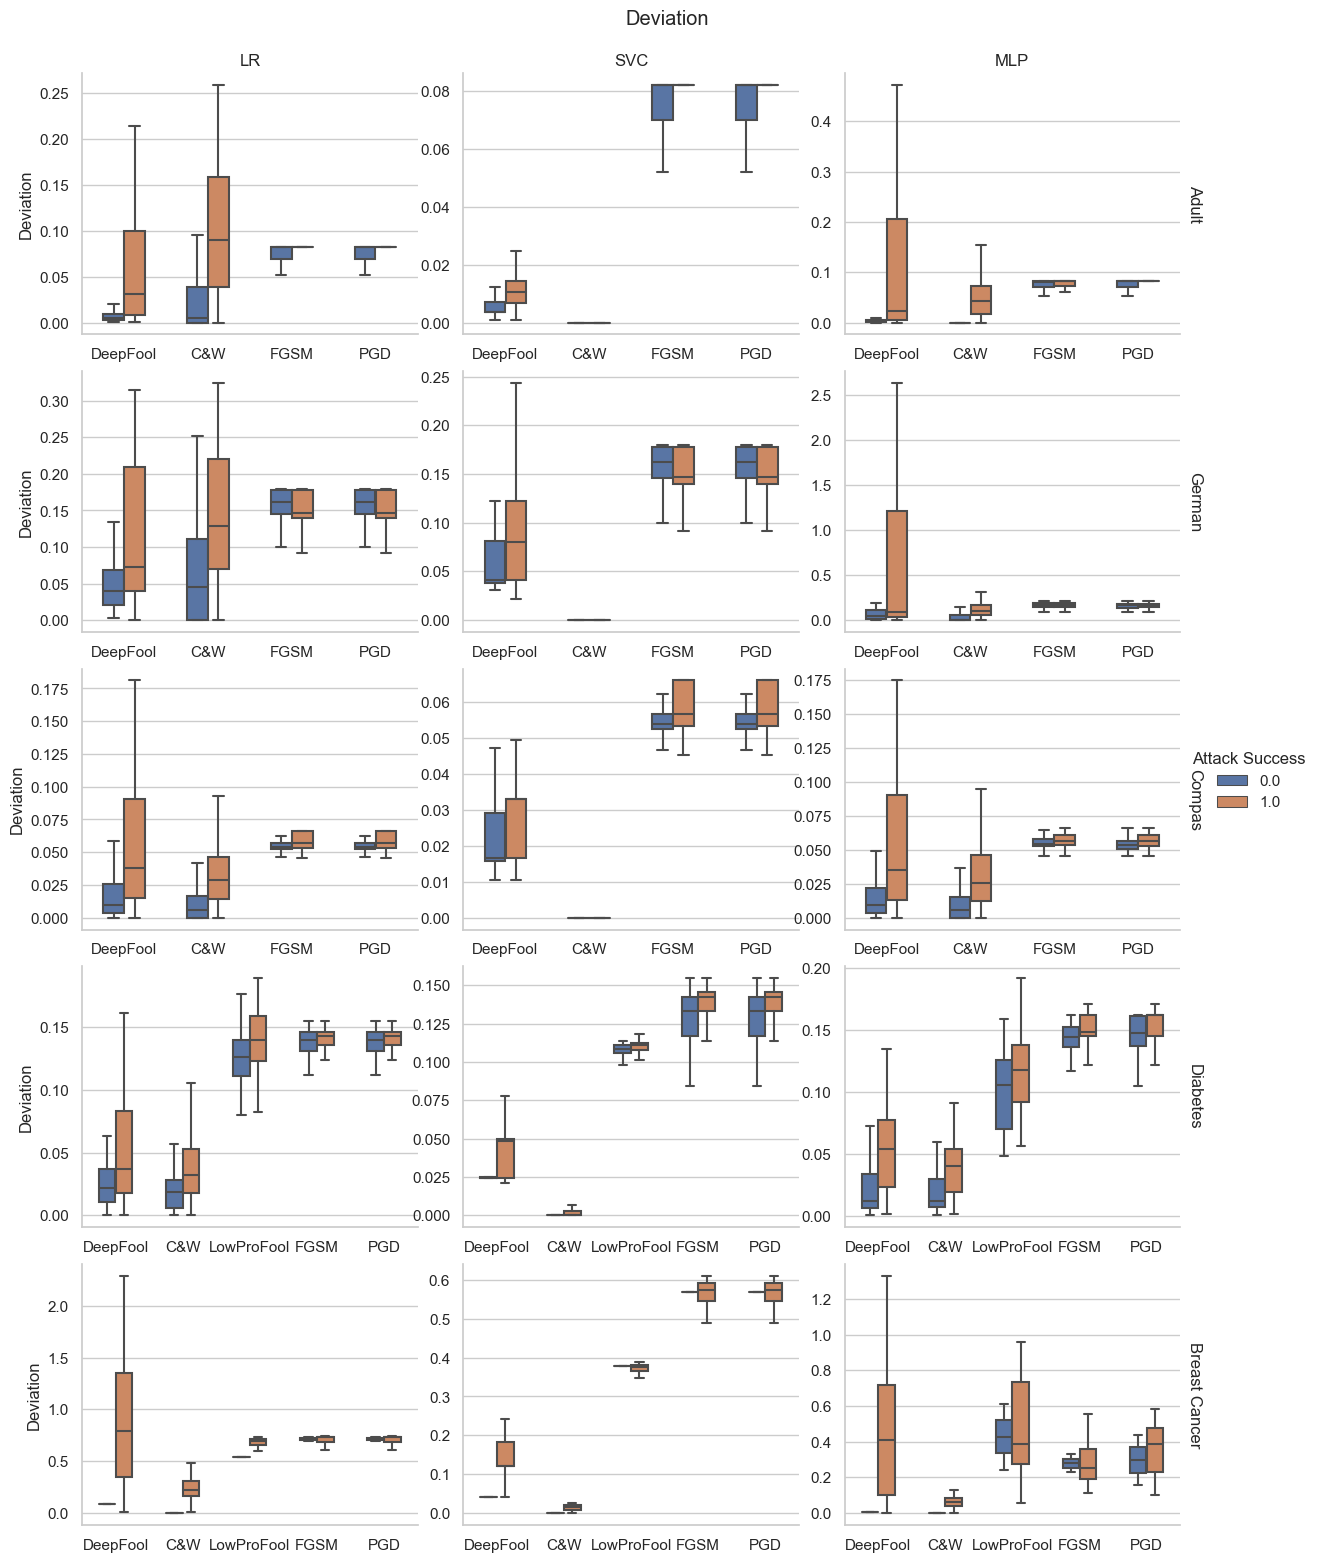

In [22]:
# Deviation
sns.set_theme(style="whitegrid")
# sns.set(font_scale=1.5)
g = sns.catplot(x="attack", y="eval_Mahalanobis", hue="attack_success", col="model", row="dataset", 
                data=data_list_list_df, kind="box", height=4, aspect=1.5, margin_titles=True,
                sharex=False, sharey=False, legend=False, showfliers=False, width=0.5)
g.set_axis_labels("", "Deviation")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.add_legend(title='Attack Success')
g.fig.subplots_adjust(top=0.94)
g.fig.suptitle('Deviation')
g.fig.set_size_inches(13, 16)
g.savefig('Visualisation/deviation_boxplot.png')

In [ ]:
# data_list_list_df.to_csv(f'all_imp.csv')

In [ ]:

sns.set_theme()
sns.set(font_scale=1.9)

# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=data_list_list_df,
    x="eval_L2", y="attack_success", 
    hue="model", col='attack', row='dataset',
    # height=5,
    logistic=True,
    facet_kws=dict(sharex=False, sharey=True, margin_titles=True),
)
g.set_titles(col_template="{col_name}", row_template="{row_name}")
# Use more informative axis labels than are provided by default
g.set_axis_labels("Proximity: L2", "Attack Success")
sns.move_legend(
    g, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
)

# g.set_titles("Dataset: Diabetes  Attack: FGSM Linf")
# g.set(title="Dataset: Diabetes  Attack: FGSM Linf")
# sns.plt.show()

In [ ]:

sns.set_theme()
sns.set(font_scale=1.9)

# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=data_list_list_df,
    x="eval_Mahalanobis", y="attack_success", 
    hue="model", col='attack', row='dataset',
    # height=5,
    logistic=True,
    facet_kws=dict(sharex=False, sharey=True, margin_titles=True),
)
g.set_titles(col_template="{col_name}", row_template="{row_name}")
# Use more informative axis labels than are provided by default
g.set_axis_labels("Deviation", "Attack Success")
sns.move_legend(
    g, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
)
# g.set_titles("Dataset: Diabetes  Attack: FGSM Linf")
# g.set(title="Dataset: Diabetes  Attack: FGSM Linf")
# sns.plt.show()

In [ ]:

sns.set_theme()
sns.set(font_scale=1.9)

# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=data_list_list_df,
    x="eval_Sen", y="attack_success", 
    hue="model", col='attack', row='dataset',
    # height=5,
    logistic=True,
    facet_kws=dict(sharex=False, sharey=True, margin_titles=True),
)
g.set_titles(col_template="{col_name}", row_template="{row_name}")
# Use more informative axis labels than are provided by default
g.set_axis_labels("Sensitivity", "Attack Success")
sns.move_legend(
    g, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
)
# g.set_titles("Dataset: Diabetes  Attack: FGSM Linf")
# g.set(title="Dataset: Diabetes  Attack: FGSM Linf")
# sns.plt.show()

In [ ]:
m = sns.FacetGrid(data=data_list_list_df, col='dataset')
m.map_dataframe(sns.barplot, x="attack", y="eval_L2", hue="model",)

# astype({'eval_L2':float, 'eval_Sen':float, 'eval_Mahalanobis':float, 'attack_success': float})